## ОБРАБОТКА ДАННЫХ

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Параметры
IMG_SIZE = 128  # Размер изображений после ресайза
DATA_DIR = "/content/drive/MyDrive/data"
CATEGORIES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

# Функция для загрузки и обработки изображений
def load_and_preprocess_data(data_dir, categories, img_size):
    data = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_label = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (img_size, img_size))
                data.append([image, class_label])
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
    return data

# Загрузка и обработка данных
print("Loading data...")
data = load_and_preprocess_data(DATA_DIR, CATEGORIES, IMG_SIZE)

# Перемешивание данных
np.random.shuffle(data)

# Разделение изображений и меток
X = np.array([item[0] for item in data])
y = np.array([item[1] for item in data])

# Нормализация изображений
X = X / 255.0

# Преобразование меток в one-hot encoding
y = to_categorical(y, num_classes=len(CATEGORIES))

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Сохранение данных для последующего использования
np.savez("processed_data(medium).npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

print("Data preprocessing completed.")

Loading data...
Data preprocessing completed.


In [ ]:
# Сохранение данных для последующего использования
np.savez("/content/drive/MyDrive/processed_data(medium).npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# Загрузка данных из файла .npz
data = np.load("/content/drive/MyDrive/processed_data(small).npz")

# Извлечение массивов
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Проверка форм данных
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3350, 64, 64, 3)
X_test shape: (838, 64, 64, 3)
y_train shape: (3350, 4)
y_test shape: (838, 4)


## АНАЛИЗ ФРЕЙМВОРКОВ

**Google AutoML Vision**

Описание: Сервис от Google для работы с задачами классификации изображений.

Преимущества:
* Простота использования через интерфейс или API.
* Автоматическая настройка архитектур нейронных сетей.
* Хорошая производительность на задачах классификации изображений.

Минусы:
* Платный, требует подключения к Google Cloud Platform.

Когда выбрать: Если есть доступ к GCP.

**H2O.ai AutoML**

Описание: Open-source решение для AutoML, поддерживающее классификацию и регрессию.

Преимущества:
* Легко интегрируется с Python через h2o библиотеку.
* Обрабатывает как табличные данные, так и изображения (с помощью встраивания нейросетей).

Минусы:
* Для изображений потребуется вручную подготовить признаки (например, использовать предварительно обученные CNN).

Когда выбрать: Если хотим гибкости и открытого кода

**AutoKeras**

Описание: Библиотека AutoML на базе TensorFlow, специально разработанная для работы с изображениями и текстом.

Преимущества:
* Полностью open-source.
* Автоматический поиск архитектур нейронных сетей (NAS).
* Простая интеграция с Python и TensorFlow.

Минусы:
* Может быть требовательным к ресурсам.

Когда выбрать: Для задач с изображениями

**MLJAR AutoML**

Описание: Инструмент AutoML, работающий как с табличными данными, так и с изображениями.

Преимущества:
* Удобный веб-интерфейс и поддержка API.
* Простота настройки для задач классификации.

Минусы:
* Ограниченная функциональность для изображений по сравнению с AutoKeras или Google AutoML.

Когда выбрать: Для небольших задач или ограниченных ресурсов

**PyCaret**

Описание: Библиотека для автоматизации машинного обучения, поддерживающая табличные данные.

Преимущества:
* Интуитивно понятный интерфейс.
* Поддержка ручной настройки шагов обработки.

Минусы:
* Не поддерживает работу с изображениями напрямую (нужно извлекать признаки).
Когда выбрать: Если вы хотим экспериментировать с табличными данными.

**TPOT**

Описание: Это фреймворк AutoML, который использует методы генетического программирования для автоматического построения оптимального машинного обучающего пайплайна. TPOT интегрируется с библиотекой scikit-learn и автоматически подбирает комбинацию предобработки данных, моделей и их гиперпараметров для достижения наилучшего результата.

Преимущества:
* Автоматизация: Позволяет существенно сократить время, затрачиваемое на ручную настройку гиперпараметров и построение пайплайна.
* Интерпретируемость: Экспортируемый код позволяет детально изучить сгенерированный пайплайн и использовать его в реальных приложениях.
* Множество встроенных операций: Включает предобработку данных, трансформации признаков и модели обучения, что делает TPOT универсальным инструментом.
* Настраиваемость: Можно регулировать глубину поиска, время обучения, наборы моделей и параметры оптимизации

Минусы:
* Высокая вычислительная стоимость: Генетическое программирование требует значительных вычислительных ресурсов, особенно при сложных задачах или больших объемах данных.
* Чувствительность к времени: При ограничении времени обучения фреймворк может не успеть исследовать все возможные комбинации, что приводит к субоптимальным результатам.
* Ограниченный выбор моделей: TPOT работает только с моделями, представленными в scikit-learn, что ограничивает его использование в задачах, требующих сложных или специализированных алгоритмов (например, глубокого обучения).
* Отсутствие поддержки необработанных данных: Для работы с изображениями, текстами и другими необработанными данными требуется предварительная ручная предобработка.

Для моей задачи с изображениями выберу AutoKeras и lightAutoML — самые подходящие варианты

# временные ограничения, настройки

## AutoKeras

Временные ограничения:

* В AutoKeras можно задать максимальное время на обучение через параметр max_trials (количество попыток поиска оптимальной архитектуры) и epochs (количество эпох для каждой модели).
* Косвенно ограничение по времени задаётся через ограничение на количество тренировочных эпох.
* Настраиваемый параметр tuner, который можно использовать для тонкой настройки времени поиска.

Настройки:

Основные параметры:
* max_trials: Количество попыток поиска оптимальной модели (по умолчанию 10).
* epochs: Количество эпох для обучения каждой архитектуры (по умолчанию 100).
* tuner: Метод поиска гиперпараметров (bayesian, random, hyperband).
* validation_split: Доля данных для валидации.

Настройки данных:

AutoKeras автоматически обрабатывает входные данные (например, масштабирует изображения или преобразует форматы), но можно настроить дополнительные этапы вручную.

Поддержка фичгенерации:

AutoKeras не занимается прямой генерацией признаков, так как это фреймворк для глубокого обучения.
Предполагается, что исходные изображения подаются напрямую (например, в формате RGB). Генерация фич в AutoKeras реализуется через автоматический подбор архитектуры нейронных сетей и использование сверточных слоёв для извлечения признаков.

## lightAutoML

LightAutoML – это библиотека автоматизированного машинного обучения (AutoML), предназначенная для построения высококачественных моделей с минимальным участием пользователя. Она предоставляет гибкие настройки и поддержку широкого спектра задач, таких как регрессия, классификация, задачи обработки временных рядов и т.д.

Настройки и параметры для управления процессом обучения

TPOT предлагает множество параметров для тонкой настройки процесса оптимизации:

1. Ограничение времени обучения:
* Параметр timeout ограничивает общее время обучения модели (в секундах).
* Например, timeout=3600 позволяет LightAutoML обучать модель в течение одного часа.
2. Конфигурация задачи:
* Task: Определяет тип задачи, например:
  - 'binary' для бинарной классификации,
  - 'multiclass' для многоклассовой классификации,
  - 'reg' для регрессии.
* Это позволяет фреймворку автоматически выбирать подходящие модели и метрики.
3. Параметры кросс-валидации:

* LightAutoML по умолчанию использует схемы кросс-валидации для оценки моделей. Пользователь может настроить количество фолдов с помощью параметра cv.
4. Выбор метрики:
* Пользователь может задать метрику через Task, например:
  - auc для ROC-AUC,
  - accuracy для точности,
  - logloss для логарифмической функции потерь.
* Это помогает оптимизировать модель под конкретные потребности.

## NAS

NAS (Neural Architecture Search) — это метод автоматического проектирования архитектур нейронных сетей. Вместо ручного подбора структуры нейронной сети (количество слоев, размер фильтров, функции активации и т.д.) NAS использует алгоритмы оптимизации для автоматического поиска наиболее подходящей архитектуры для конкретной задачи.

**Основные компоненты NAS**

1. Пространство поиска (Search Space):

* Определяет все возможные архитектуры, которые можно рассмотреть. Это включает параметры, такие как:
  - Количество слоев.
  - Типы операций (например, сверточные, полносвязные).
  - Размеры фильтров, ядра или шага.
  - Типы соединений между слоями.
* Пространство поиска может быть дискретным или непрерывным.

2. Стратегия поиска (Search Strategy):

* Алгоритм, который выбирает архитектуры из пространства поиска для оценки.
* Популярные стратегии:
  - Случайный поиск (Random Search): Архитектуры выбираются случайно.
  - Эволюционный алгоритм (Evolutionary Algorithm): Использует принципы естественного отбора для улучшения архитектур.
  - Усиленное обучение (Reinforcement Learning): Агент обучается выбирать архитектуры на основе их производительности.
  - Градиентный метод: Применяется в дифференцируемых NAS, где пространство поиска делает градиенты доступными.

3. Метод оценки (Evaluation Method):

* Оценка производительности выбранных архитектур.
* Часто включает обучение архитектуры на подмножестве данных для оценки её качества.
* Методы оценки:
  - Полное обучение: Тренировка сети до конца — точный, но дорогой подход.
  - Привязки (Proxy Models): Использование упрощенных задач или меньших данных для быстрой оценки.
  - Одноразовые сети (One-Shot Models): Обучение одной большой сети, содержащей множество архитектур, для ускорения оценки.

**Как работает NAS**

1. Определение пространства поиска.
* Исследователи задают параметры возможных архитектур.
2. Поиск архитектуры.
* Алгоритм начинает исследование пространства поиска, выбирая и оценивая архитектуры.
* Каждая архитектура тренируется и проверяется на валидационном наборе данных для оценки качества.
3. Оптимизация.
* Алгоритм обновляет свои гипотезы (например, через генетические мутации, градиенты или политику в reinforcement learning) и продолжает поиск.
4. Выбор лучшей архитектуры.
* Архитектура с наилучшей производительностью выбирается для финального обучения.

**Преимущества NAS**

* Автоматизация: Уменьшает или устраняет потребность в ручной настройке архитектуры.
* Оптимальные решения: Позволяет находить архитектуры, которые превосходят модели, спроектированные вручную.
* Адаптивность: Может быть применен к широкому спектру задач, включая классификацию, сегментацию и обработку временных рядов.

**Недостатки NAS**

1. Высокая вычислительная стоимость:
* Поиск архитектуры может потребовать огромных ресурсов, особенно если нужно оценивать много архитектур.
* Например, ранние подходы, такие как NASNet от Google, требовали тысяч GPU-часов.
2. Сложность настройки:
* Хотя NAS автоматизирует поиск архитектуры, выбор подходящих стратегий и пространства поиска остаётся сложной задачей.
3. Риск переобучения:
* Найденная архитектура может переобучиться под данные поиска, а не обобщаться на новые данные.

**Современные улучшения NAS**
1. Эффективные стратегии оценки:
* Методы, такие как одноразовые сети (One-Shot Models) или тренировка только части сети, значительно снижают затраты.
2. Дифференцируемый NAS (DARTS):
* Преобразует задачу поиска в задачу оптимизации, применяя градиентный спуск, чтобы сделать процесс более быстрым.
3. NAS в реальном времени:
* Интеграция NAS с задачами, где поиск архитектуры и обучение модели происходят одновременно.

**Применение NAS**
1. Классификация изображений:
* Проектирование сверточных сетей для задач классификации (например, NASNet, AmoebaNet).
2. Обработка текста:
* Поиск архитектур для моделей трансформеров и рекуррентных сетей (например, Evolved Transformer).
3. Автономные системы:
* Проектирование сетей для управления роботами или транспортными средствами.
4. Мобильные приложения:
* Разработка компактных моделей для работы на устройствах с ограниченными ресурсами (например, MobileNetV3, созданная с помощью NAS).

NAS — мощный инструмент в арсенале современных разработчиков, который помогает автоматизировать процесс проектирования нейронных сетей, снижая время и ресурсы, затрачиваемые на экспериментирование.

# Пайплайн

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

In [ ]:
# Создание модели нейронной сети
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавим Dropout для предотвращения переобучения
    Dense(4, activation='softmax')  # 4 класса
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Настройка обратного вызова для ранней остановки
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 24s 143ms/step - accuracy: 0.5790 - loss: 1.1981 - val_accuracy: 0.8282 - val_loss: 0.4830
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step - accuracy: 0.8066 - loss: 0.4763 - val_accuracy: 0.8162 - val_loss: 0.4222
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8218 - loss: 0.4254 - val_accuracy: 0.8461 - val_loss: 0.3431
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8341 - loss: 0.3917 - val_accuracy: 0.8341 - val_loss: 0.3833
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8433 - loss: 0.3774 - val_accuracy: 0.8592 - val_loss: 0.3534
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.8436 - loss: 0.3694 - val_accuracy: 0.8687 - val_loss: 0.2950
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.8809 - loss: 0.3069 - val_accuracy: 0.8604 - val_loss: 0.3108
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.8866 - loss: 0.2741 - val_

In [ ]:
# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Сохранение модели
model.save("/content/drive/MyDrive/corn_disease_classifier.keras")

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Test Accuracy: 0.8914


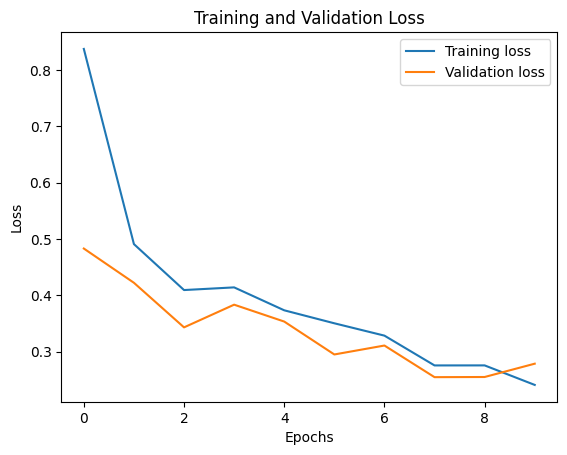

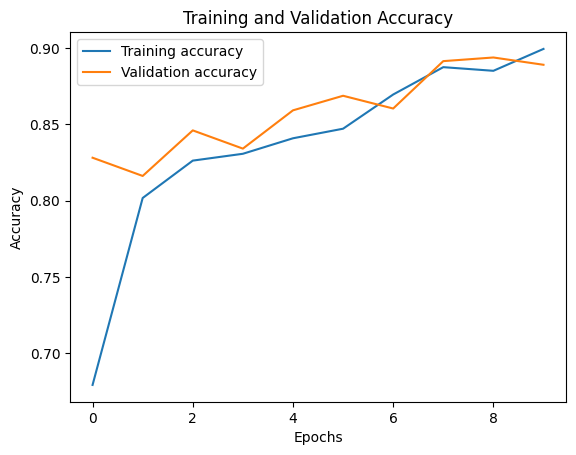

In [ ]:
# Визуализация результатов обучения
import matplotlib.pyplot as plt

# Тренировочные и валидационные потери
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Тренировочная и валидационная точность
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 714.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
t

In [ ]:
import autokeras as ak
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
# Загружаем данные (предполагается, что они уже сохранены в 'processed_data.npz')
data = np.load("/content/drive/MyDrive/processed_data.npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [ ]:
# Использование AutoKeras для классификации изображений
clf = ak.ImageClassifier(
    overwrite=True,  # Ожидаем перезапись модели, если уже была обучена
    max_trials=2  # Количество попыток (моделей), которые AutoKeras попробует
)

In [ ]:
# Уменьшаем размер данных
X_train_small = X_train[:500]
y_train_small = y_train[:500]
X_test_small = X_test[:100]
y_test_small = y_test[:100]

# Обучение AutoKeras с уменьшенными данными
clf = ak.ImageClassifier(overwrite=True, max_trials=2)
clf.fit(X_train_small, y_train_small, epochs=10)

Trial 2 Complete [00h 02m 33s]
val_loss: 1.3873980045318604

Best val_loss So Far: 0.46526893973350525
Total elapsed time: 00h 03m 19s
Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 658ms/step - accuracy: 0.4112 - loss: 10.9612
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.5794 - loss: 0.9049
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.6031 - loss: 0.8449
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7019 - loss: 0.7782
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - accuracy: 0.8034 - loss: 0.6015
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.8281 - loss: 0.4387
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8603 - loss: 0.4026
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.9404 - loss: 0.2212
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - accuracy: 0.9699 - loss: 0.1141
Epoch 10/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.9791 - loss: 0.0864


In [ ]:
# Обучение модели с использованием AutoKeras
clf.fit(X_train, y_train, epochs=10)

In [ ]:
# Оценка модели AutoKeras
y_pred = clf.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [ ]:
# Оценка точности
accuracy_automl = accuracy_score(y_test_classes, y_pred_classes)
print(f"AutoKeras Test Accuracy: {accuracy_automl:.4f}")

AutoKeras Test Accuracy: 0.8162


In [ ]:
from tensorflow.keras.models import load_model
# Сравнение с вашей моделью на Keras
# Пример того, как получить точность с вашей модели:
model = load_model("/content/drive/MyDrive/corn_disease_classifier.keras")
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = np.argmax(y_pred_keras, axis=1)
accuracy_keras = accuracy_score(y_test_classes, y_pred_keras_classes)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


In [ ]:
print(f"Keras Model Test Accuracy: {accuracy_keras:.4f}")

# Выводим результат сравнения
print(f"Comparison - AutoKeras Accuracy: {accuracy_automl:.4f}, Keras Model Accuracy: {accuracy_keras:.4f}")


Keras Model Test Accuracy: 0.8914
Comparison - AutoKeras Accuracy: 0.8162, Keras Model Accuracy: 0.8914


In [4]:
!pip uninstall -y tensorflow tf-keras autokeras


Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: autokeras 1.0.15
Uninstalling autokeras-1.0.15:
  Successfully uninstalled autokeras-1.0.15


In [1]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-k

In [5]:
!pip install --upgrade autokeras tensorflow

In [6]:
pip install tensorflow==2.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.17.0 which is incompatible.


In [1]:
import numpy as np
import autokeras as ak
from sklearn.metrics import accuracy_score
import tensorflow as tf
import os

# Загружаем данные (предполагается, что они уже сохранены в 'processed_data(small).npz')
data = np.load("/content/drive/MyDrive/processed_data(small).npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Убедимся, что форма данных соответствует ожидаемой форме
assert X_train.shape[1:] == (64, 64, 3), "X_train should have shape (64, 64, 3)"
assert X_test.shape[1:] == (64, 64, 3), "X_test should have shape (64, 64, 3)"

# Убедимся, что метки начинаются с 0 и идут последовательно
assert y_train.min() == 0, "Labels should start from 0"
assert y_test.min() == 0, "Labels should start from 0"

# Убедимся, что метки меньше числа классов
num_classes = len(np.unique(y_train))
assert y_train.max() < num_classes, "Labels should be less than number of classes"
assert y_test.max() < num_classes, "Labels should be less than number of classes"

# Использование AutoKeras для классификации изображений
clf = ak.ImageClassifier(
    overwrite=True,  # Ожидаем перезапись модели, если уже была обучена
    max_trials=2,    # Количество попыток (моделей), которые AutoKeras попробует
)

# Обучение модели с использованием AutoKeras
try:
    clf.fit(X_train, y_train, epochs=10)
except Exception as e:
    print(f"An error occurred during training: {e}")

# Оценка модели AutoKeras
y_pred = clf.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy_automl = accuracy_score(y_test_classes, y_pred_classes)
print(f"AutoKeras Test Accuracy: {accuracy_automl:.4f}")

# Экспорт модели в формат Keras
model = clf.export_model()

# Сохранение модели
model_path = "/content/drive/MyDrive/saved_autokeras_model.keras"
model.save(model_path)
print(f"Model saved to {model_path}")

Trial 2 Complete [00h 08m 53s]
val_loss: 0.649798572063446

Best val_loss So Far: 0.34094348549842834
Total elapsed time: 00h 09m 25s
Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.6366 - loss: 0.8920
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8189 - loss: 0.4351
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8573 - loss: 0.3425
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8831 - loss: 0.2952
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9004 - loss: 0.2513
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9148 - loss: 0.2123
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9230 - loss: 0.1976
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9369 - loss: 0.1712
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9328 - loss: 0.1763
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9515 - loss: 0.1363


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AutoKeras Test Accuracy: 0.8890
Model saved to /content/drive/MyDrive/saved_autokeras_model.keras


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


весь код

In [ ]:
!pip install autokeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.2/691.2 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 76.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model
import autokeras as ak

# Загрузка данных из файла .npz
data = np.load("/content/drive/MyDrive/processed_data(small).npz")

# Извлечение массивов
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Проверка форм данных
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Создание модели нейронной сети
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),  # Добавим Dropout для предотвращения переобучения
    Dense(4, activation='softmax')  # 4 класса
])

# Компиляция модели
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Настройка обратного вызова для ранней остановки
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Обучение модели
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

# Оценка модели на тестовых данных
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Сохранение модели
model.save("/content/drive/MyDrive/corn_disease_classifier.keras")

import numpy as np
# Загружаем данные (предполагается, что они уже сохранены в 'processed_data.npz')
data = np.load("/content/drive/MyDrive/processed_data(small).npz")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

# Использование AutoKeras для классификации изображений
clf = ak.ImageClassifier(
    overwrite=True,  # Ожидаем перезапись модели, если уже была обучена
    max_trials=2  # Количество попыток (моделей), которые AutoKeras попробует
)

# Обучение модели с использованием AutoKeras
clf.fit(X_train, y_train, epochs=10)

# Оценка модели AutoKeras
y_pred = clf.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразование вероятностей в классы
y_test_classes = np.argmax(y_test, axis=1)

# Оценка точности
accuracy_automl = accuracy_score(y_test_classes, y_pred_classes)
print(f"AutoKeras Test Accuracy: {accuracy_automl:.4f}")

# Сравнение с вашей моделью на Keras
# Пример того, как получить точность с вашей модели:
model = load_model("/content/drive/MyDrive/corn_disease_classifier.keras")
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = np.argmax(y_pred_keras, axis=1)
accuracy_keras = accuracy_score(y_test_classes, y_pred_keras_classes)

print(f"Keras Model Test Accuracy: {accuracy_keras:.4f}")

# Выводим результат сравнения
print(f"Comparison - AutoKeras Accuracy: {accuracy_automl:.4f}, Keras Model Accuracy: {accuracy_keras:.4f}")



Trial 2 Complete [00h 09m 52s]
val_loss: 0.5178412199020386

Best val_loss So Far: 0.35354334115982056
Total elapsed time: 00h 10m 10s
Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.6316 - loss: 0.8871
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8253 - loss: 0.4206
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8506 - loss: 0.3528
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8694 - loss: 0.3136
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8896 - loss: 0.2608
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9048 - loss: 0.2446
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9182 - loss: 0.1957
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9484 - loss: 0.1610
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9438 - loss: 0.1572
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9546 - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AutoKeras Test Accuracy: 0.8807
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Keras Model Test Accuracy: 0.9129
Comparison - AutoKeras Accuracy: 0.8807, Keras Model Accuracy: 0.9129


**lightAutoML**

In [ ]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.6/399.6 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.2 MB/s eta 0:00:00
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7594 sha256=9567a2193adc99a81596272544e5e13965e2fbd0b3e544166c20fd6acb261144
  St

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import accuracy_score
import time

# Параметры
IMG_SIZE = 64  # Размер изображений после ресайза для ResNet50
DATA_DIR = "/content/drive/MyDrive/data"
CATEGORIES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

# Загрузка предобученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(data):
    features_list = []
    for img in data:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Ресайз до нужного размера
        img = np.expand_dims(img, axis=0)  # Добавляем размерность батча
        img = preprocess_input(img)  # Препроцессинг для ResNet50
        features = model.predict(img).flatten()  # Извлечение признаков и преобразование в одномерный массив
        features_list.append(features)
    return np.array(features_list)

# Загрузка предобработанных данных
file_path = '/content/drive/MyDrive/processed_data(small).npz'  # Используем новый файл с данными
data = np.load(file_path)
X_train = data['X_train']  # Обучающая выборка (признаки)
X_test = data['X_test']    # Тестовая выборка (признаки)
y_train = data['y_train']  # Обучающая выборка (метки)
y_test = data['y_test']    # Тестовая выборка (метки)

# Извлечение признаков с помощью ResNet50
print("Extracting features from images...")
start_time = time.time()

X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds.")

# Преобразование меток в индексы классов
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Переименование столбцов в DataFrame
feature_names = [f'feature_{i}' for i in range(X_train_features.shape[1])]
train_df = pd.DataFrame(X_train_features, columns=feature_names)
train_df['label'] = y_train_labels

test_df = pd.DataFrame(X_test_features, columns=feature_names)
test_df['label'] = y_test_labels

# Определение задачи
task = Task('multiclass')

# Создание объекта AutoML
automl = TabularAutoML(task=task, timeout=3600)  # Ограничение времени обучения в 1 час (3600 секунд)

# Обучение модели на тренировочных данных
roles = {'target': 'label'}  # Указываем целевую переменную

# Обучение модели
print("Training the model with LightAutoML...")
start_time = time.time()

oof_pred = automl.fit_predict(train_df, roles=roles)

print(f"Model training completed in {time.time() - start_time:.2f} seconds.")

Extracting features from images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: multiclass

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (3350, 2049)



Training the model with LightAutoML...


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3585.82 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [6, 7, 30, 60, 84, 109, 137, 169, 175, 198, 199, 205, 224, 239, 253], 'embed_sizes': array([11, 11,  2, 11,  2, 11, 11,  2, 11, 10, 11,  2,  2, 11, 11],
      dtype=int32), 'data_size': 274}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -1.1769503087168025
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = -0.999691453877856
INFO3:lighta

Model training completed in 1361.26 seconds.


AttributeError: 'TabularAutoML' object has no attribute 'save'

In [ ]:
import pickle

# Сохранение модели с помощью pickle
model_path = "/content/drive/MyDrive/saved_automl_model.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(automl, f)

print(f"Model saved to {model_path}")

# Загрузка модели с помощью pickle
with open(model_path, 'rb') as f:
    loaded_automl = pickle.load(f)

print(f"Model loaded from {model_path}")

# Предсказание на тестовых данных
test_pred = loaded_automl.predict(test_df)

# Преобразование предсказаний в массив меток
pred_labels = np.argmax(test_pred.data, axis=1)
true_labels = test_df['label'].values

# Вычисление точности
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy:.4f}")


Model saved to /content/drive/MyDrive/saved_automl_model.pkl
Model loaded from /content/drive/MyDrive/saved_automl_model.pkl
Accuracy: 0.8353


Увеличим размер изображений

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.metrics import accuracy_score
import time
import pickle

# Параметры
IMG_SIZE = 128  # Размер изображений после ресайза для ResNet50
DATA_DIR = "/content/drive/MyDrive/data"
CATEGORIES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

# Загрузка предобученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(data):
    features_list = []
    for img in data:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Ресайз до нужного размера
        img = np.expand_dims(img, axis=0)  # Добавляем размерность батча
        img = preprocess_input(img)  # Препроцессинг для ResNet50
        features = model.predict(img).flatten()  # Извлечение признаков и преобразование в одномерный массив
        features_list.append(features)
    return np.array(features_list)

# Загрузка предобработанных данных
file_path = '/content/drive/MyDrive/processed_data(medium).npz'  # Используем новый файл с данными
data = np.load(file_path)
X_train = data['X_train']  # Обучающая выборка (признаки)
X_test = data['X_test']    # Тестовая выборка (признаки)
y_train = data['y_train']  # Обучающая выборка (метки)
y_test = data['y_test']    # Тестовая выборка (метки)

# Извлечение признаков с помощью ResNet50
print("Extracting features from images...")
start_time = time.time()

X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds.")

# Преобразование меток в индексы классов
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Переименование столбцов в DataFrame
feature_names = [f'feature_{i}' for i in range(X_train_features.shape[1])]
train_df = pd.DataFrame(X_train_features, columns=feature_names)
train_df['label'] = y_train_labels

test_df = pd.DataFrame(X_test_features, columns=feature_names)
test_df['label'] = y_test_labels

# Определение задачи
task = Task('multiclass')

# Создание объекта AutoML
automl = TabularAutoML(task=task, timeout=3600)  # Ограничение времени обучения в 1 час (3600 секунд)

# Обучение модели на тренировочных данных
roles = {'target': 'label'}  # Указываем целевую переменную

# Обучение модели
print("Training the model with LightAutoML...")
start_time = time.time()

oof_pred = automl.fit_predict(train_df, roles=roles)

print(f"Model training completed in {time.time() - start_time:.2f} seconds.")

# Сохранение модели с помощью pickle
model_path = "/content/drive/MyDrive/saved_automl_model.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(automl, f)

print(f"Model saved to {model_path}")

# Загрузка модели с помощью pickle
with open(model_path, 'rb') as f:
    loaded_automl = pickle.load(f)

print(f"Model loaded from {model_path}")

# Предсказание на тестовых данных
test_pred = loaded_automl.predict(test_df)

# Преобразование предсказаний в массив меток
pred_labels = np.argmax(test_pred.data, axis=1)
true_labels = test_df['label'].values

# Вычисление точности
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy:.4f}")


Extracting features from images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: multiclass

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (3350, 2049)



Training the model with LightAutoML...


INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3586.55 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [12, 25, 26, 37, 44, 57, 80, 90, 99, 120, 132, 149, 152, 220, 236, 242, 254, 268, 278, 282, 286, 291, 297, 331, 370, 381], 'embed_sizes': array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  9, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int32), 'data_size': 417}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = -1.1377934072092744
INFO3:lightautom

Model training completed in 1364.26 seconds.
Model saved to /content/drive/MyDrive/saved_automl_model.pkl
Model loaded from /content/drive/MyDrive/saved_automl_model.pkl
Accuracy: 0.8401


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


## Своя модель на основе нейронной сети с Keras-Tuner


Trial 10 Complete [00h 00m 46s]
val_accuracy: 0.8520286679267883

Best val_accuracy So Far: 0.8818615674972534
Total elapsed time: 00h 08m 13s

Best hyperparameters:
Conv1 filters: 16,
Conv1 kernel size: 5,
Conv2 filters: 128,
Conv2 kernel size: 3,
Dropout rate: 0.3,
Dense units: 256,
Learning rate: 0.001

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.5221 - loss: 2.7330 - val_accuracy: 0.7924 - val_loss: 0.4798
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8179 - loss: 0.4475 - val_accuracy: 0.8377 - val_loss: 0.3869
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8664 - loss: 0.3262 - val_accuracy: 0.8317 - val_loss: 0.3652
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8956 - loss: 0.2554 - val_accuracy: 0.8150 - val_loss: 0.3921
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9016 - loss: 0.2607 - val_accuracy: 0.8496 - val_loss: 0.4078
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 22m

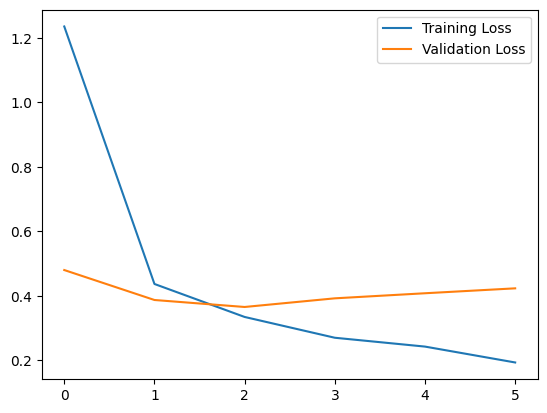

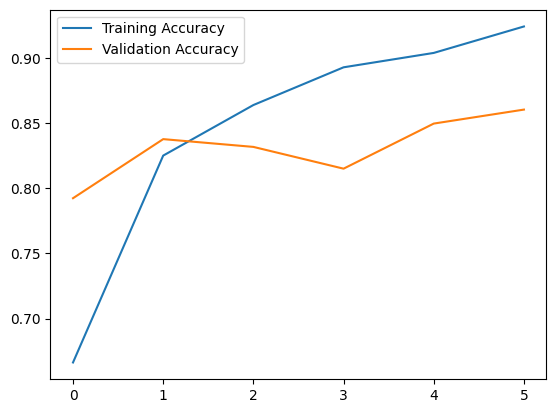

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner.tuners import RandomSearch
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Загрузка предобработанных данных
file_path = '/content/drive/MyDrive/processed_data(medium).npz'  # Используем новый файл с данными
data = np.load(file_path)
X_train = data['X_train']  # Обучающая выборка (признаки)
X_test = data['X_test']    # Тестовая выборка (признаки)
y_train = data['y_train']  # Обучающая выборка (метки)
y_test = data['y_test']    # Тестовая выборка (метки)

# Гипермодель для настройки
def build_model(hp):
    model = Sequential()

    # Первый сверточный слой
    model.add(
        Conv2D(
            filters=hp.Choice('conv1_filters', values=[16, 32, 64]),
            kernel_size=hp.Choice('conv1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=X_train.shape[1:]
        )
    )
    model.add(MaxPooling2D(pool_size=2))

    # Второй сверточный слой
    model.add(
        Conv2D(
            filters=hp.Choice('conv2_filters', values=[32, 64, 128]),
            kernel_size=hp.Choice('conv2_kernel', values=[3, 5]),
            activation='relu'
        )
    )
    model.add(MaxPooling2D(pool_size=2))

    # Добавление dropout
    model.add(Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])))

    # Полносвязный слой
    model.add(Flatten())
    model.add(
        Dense(
            units=hp.Choice('dense_units', values=[64, 128, 256]),
            activation='relu'
        )
    )

    # Выходной слой
    model.add(Dense(4, activation='softmax'))

    # Компиляция модели
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Настройка RandomSearch для поиска
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Количество испытаний
    executions_per_trial=1,
    directory='nas_corn_disease',
    project_name='corn_disease'
)

# Обучение гипермоделей
tuner.search(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

# Вывод лучшей модели
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
Conv1 filters: {best_hps.get('conv1_filters')},
Conv1 kernel size: {best_hps.get('conv1_kernel')},
Conv2 filters: {best_hps.get('conv2_filters')},
Conv2 kernel size: {best_hps.get('conv2_kernel')},
Dropout rate: {best_hps.get('dropout_rate')},
Dense units: {best_hps.get('dense_units')},
Learning rate: {best_hps.get('learning_rate')}
""")

# Создание и обучение лучшей модели
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

# Оценка точности на тестовых данных
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Сохранение модели
best_model.save("/content/drive/MyDrive/corn_disease_classifier_NAS(Keras-Tuner).keras")

# Визуализация результатов
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


# ОЦЕНКА ВСЕХ МОДЕЛЕЙ, ВЫВОД МЕТРИК

In [3]:
!pip install -U lightautoml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.6/399.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.0/216.0 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00
  Created wheel for json2html: filename=json2html-1.3.0-py3-none-any.whl size=7594 sha256=43a051a6486bf96fbc5d1606637f87f27f23b1666854dbda1f233f4c3ce153c2
  Stor

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from lightautoml.automl.presets.tabular_presets import TabularAutoML
import pickle
import autokeras
import cv2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

# Пути к моделям
custom_model_path = '/content/drive/MyDrive/corn_disease_classifier.keras'
autokeras_model_path = '/content/drive/MyDrive/saved_autokeras_model.keras'
lightautoml_model_path = '/content/drive/MyDrive/saved_automl_model.pkl'
keras_tuner_model_path = '/content/drive/MyDrive/corn_disease_classifier_NAS(Keras-Tuner).keras'

# Загрузка данных из файла .npz для small (64x64)
data_small = np.load("/content/drive/MyDrive/processed_data(small).npz")

# Извлечение массивов для small
X_train_small = data_small["X_train"]
X_test_small = data_small["X_test"]
y_train_small = data_small["y_train"]
y_test_small = data_small["y_test"]

# Преобразование y_test в одномерный массив для small, если это индикаторная матрица
if len(y_test_small.shape) > 1 and y_test_small.shape[1] > 1:
    y_test_small = np.argmax(y_test_small, axis=1)

# Загрузка данных из файла .npz для medium (128x128)
data_medium = np.load("/content/drive/MyDrive/processed_data(medium).npz")

# Извлечение массивов для medium
X_train_medium = data_medium["X_train"]
X_test_medium = data_medium["X_test"]
y_train_medium = data_medium["y_train"]
y_test_medium = data_medium["y_test"]

# Преобразование y_test в одномерный массив для medium, если это индикаторная матрица
if len(y_test_medium.shape) > 1 and y_test_medium.shape[1] > 1:
    y_test_medium = np.argmax(y_test_medium, axis=1)

# Загрузка предобученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

# Функция для извлечения признаков
def extract_features(data, model):
    features_list = []
    for img in data:
        img = cv2.resize(img, (128, 128))  # Ресайз до нужного размера
        img = np.expand_dims(img, axis=0)  # Добавляем размерность батча
        img = preprocess_input(img)  # Препроцессинг для ResNet50
        features = model.predict(img).flatten()  # Извлечение признаков и преобразование в одномерный массив
        features_list.append(features)
    return np.array(features_list)

# Функция для оценки модели
def evaluate_model(model, X_test, y_test, model_name, input_format="image"):
    print(f"\nОценка модели: {model_name}")

    # Преобразуем данные в вектор, если формат входных данных "flattened"
    if input_format == "flattened":
        X_test = X_test.reshape((X_test.shape[0], -1))

    y_pred = model.predict(X_test)
    if y_pred.shape[1] > 1:  # Для многоклассовой классификации
        y_pred_classes = np.argmax(y_pred, axis=1)
    else:  # Для бинарной классификации
        y_pred_classes = (y_pred > 0.5).astype(int).flatten()

    print("Classification Report:\n", classification_report(y_test, y_pred_classes))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

# Загрузка и оценка кастомной модели на Keras (используем данные small для этого)
custom_model = tf.keras.models.load_model(custom_model_path)
evaluate_model(custom_model, X_test_small, y_test_small, "Custom Model (Keras)", input_format="image")

# Загрузка и оценка AutoKeras модели (используем данные small для этого)
autokeras_model = tf.keras.models.load_model(autokeras_model_path)
evaluate_model(autokeras_model, X_test_small, y_test_small, "AutoKeras Model", input_format="image")

# Загрузка и оценка кастомной модели с Keras-Tuner (используем данные medium для этого)
keras_tuner_model = tf.keras.models.load_model(keras_tuner_model_path)

# Изменение размера изображений до 128x128, как ожидает модель Keras-Tuner
X_test_resized = np.array([tf.image.resize(img, (128, 128)) for img in X_test_small])

# Оценка модели с измененными размерами
evaluate_model(keras_tuner_model, X_test_resized, y_test_small, "Custom Model (Keras-Tuner)", input_format="image")

# Загрузка и оценка модели LightAutoML (используем данные medium для этого)
print("\nОценка модели: LightAutoML")
with open(lightautoml_model_path, 'rb') as f:
    lightautoml_model = pickle.load(f)

# Проверка размерности X_test_medium
print(f"Размерность X_test_medium: {X_test_small.shape}")
if X_test_small.shape[0] == 0:
    raise ValueError("Размер тестового набора данных для medium пустой.")

# Преобразование тестовых данных medium в извлечённые признаки с использованием модели ResNet50
X_test_small_features = extract_features(X_test_small, model)

# LightAutoML требует табличного формата данных
X_test_small_df = pd.DataFrame(X_test_small_features, columns=[f'feature_{i}' for i in range(X_test_small_features.shape[1])])
X_test_small_df['label'] = y_test_medium

# Предсказание на тестовых данных
predictions = lightautoml_model.predict(X_test_small_df).data
if predictions.shape[1] > 1:
    y_pred_classes = np.argmax(predictions, axis=1)
else:
    y_pred_classes = (predictions > 0.5).astype(int).flatten()

print("Classification Report:\n", classification_report(y_test_small, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test_small, y_pred_classes))



Оценка модели: Custom Model (Keras)
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       221
           1       0.97      0.97      0.97       249
           2       0.84      0.57      0.68       109
           3       1.00      0.99      0.99       259

    accuracy                           0.91       838
   macro avg       0.90      0.86      0.87       838
weighted avg       0.92      0.91      0.91       838

Confusion Matrix:
 [[206   3  12   0]
 [  7 241   0   1]
 [ 44   3  62   0]
 [  2   1   0 256]]

Оценка модели: AutoKeras Model


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       221
           1       0.95      0.96      0.96       249
           2       0.73      0.50      0.59       109
           3       0.98      1.00      0.99       259

    accuracy                           0.89       838
   macro avg       0.86      0.83      0.84       838
weighted avg       0.89      0.89      0.88       838

Confusion Matrix:
 [[193   7  19   2]
 [  5 240   1   3]
 [ 49   6  54   0]
 [  1   0   0 258]]

Оценка модели: Custom Model (Keras-Tuner)
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       221
           1       0.99      0.97      0.98       249
           2       0.97      0.33      0.49       109
           3       1.00      1.00      1.00       259

    accuracy              

In [21]:
import os
import cv2
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import time

# Параметры
IMG_SIZE = 128  # Размер изображений после ресайза для ResNet50
DATA_DIR = "/content/drive/MyDrive/data"
CATEGORIES = ["Blight", "Common_Rust", "Gray_Leaf_Spot", "Healthy"]

# Загрузка предобученной модели ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Model(inputs=base_model.input, outputs=base_model.output)

def extract_features(data):
    features_list = []
    for img in data:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Ресайз до нужного размера
        img = np.expand_dims(img, axis=0)  # Добавляем размерность батча
        img = preprocess_input(img)  # Препроцессинг для ResNet50
        features = model.predict(img).flatten()  # Извлечение признаков и преобразование в одномерный массив
        features_list.append(features)
    return np.array(features_list)

# Загрузка предобработанных данных
file_path = '/content/drive/MyDrive/processed_data(medium).npz'  # Используем новый файл с данными
data = np.load(file_path)
X_train = data['X_train']  # Обучающая выборка (признаки)
X_test = data['X_test']    # Тестовая выборка (признаки)
y_train = data['y_train']  # Обучающая выборка (метки)
y_test = data['y_test']    # Тестовая выборка (метки)

# Извлечение признаков с помощью ResNet50
print("Extracting features from images...")
start_time = time.time()

X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)

print(f"Feature extraction completed in {time.time() - start_time:.2f} seconds.")

# Преобразование меток в индексы классов
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Переименование столбцов в DataFrame
feature_names = [f'feature_{i}' for i in range(X_train_features.shape[1])]
train_df = pd.DataFrame(X_train_features, columns=feature_names)
train_df['label'] = y_train_labels

test_df = pd.DataFrame(X_test_features, columns=feature_names)
test_df['label'] = y_test_labels

# Загрузка модели с помощью pickle
model_path = "/content/drive/MyDrive/saved_automl_model.pkl"
with open(model_path, 'rb') as f:
    loaded_automl = pickle.load(f)

print(f"Model loaded from {model_path}")

# Предсказание на тестовых данных
test_pred = loaded_automl.predict(test_df)

# Преобразование предсказаний в массив меток
pred_labels = np.argmax(test_pred.data, axis=1)
true_labels = test_df['label'].values

# Вычисление точности
accuracy = accuracy_score(true_labels, pred_labels)
print(f"Accuracy: {accuracy:.4f}")

# Вывод более подробных метрик
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels))

print("\nConfusion Matrix:")
print(confusion_matrix(true_labels, pred_labels))


Extracting features from images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━

IndexError: index 326 is out of bounds for dimension 0 with size 284